In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
countries = ['Turkey', 'Germany', 'United States']
df = df[df['location'].isin(countries)]

In [9]:
df[['location', 'date', 'total_cases', 'total_deaths']].head()

,location,date,total_cases,total_deaths
113525,Germany,2020-01-03,NaN,NaN
113526,Germany,2020-01-04,1.0,NaN
113527,Germany,2020-01-05,1.0,3.0
113528,Germany,2020-01-06,1.0,3.0
113529,Germany,2020-01-07,1.0,3.0


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
turkey = df[df['location'] == 'Turkey']

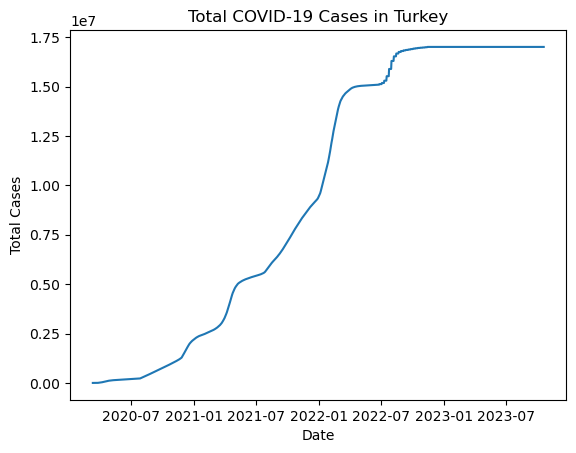

In [13]:
plt.figure()
plt.plot(turkey['date'], turkey['total_cases'])
plt.title("Total COVID-19 Cases in Turkey")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()